## Library

In [1]:
import os
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))
VARIABLE_SETS = {}


VARIABLE_SETS['Cotra2020'] = {
    'initial_gdp': 23*T,                  # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 23 trillion)
    'algo_doubling_rate_max': 3.5,        # 90% CI, algorithms get twice as efficient every X years (maximum)
    'algo_doubling_rate_min': 2,          # 90% CI, algorithms get twice as efficient every X years (minimum)
    'min_reduction': 2,                   # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'max_reduction': 5,                   # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'initial_flop_per_dollar': 17.3,      # 90% CI, as of today, we can buy 10^X FLOP per $ (originally 17 for 2020)
    'flop_halving_rate': 2.5,             # 90% CI, the cost of FLOP per $ halves every X years
    'max_flop_per_dollar': 24,            # 90% CI, the cheapest FLOP will get is 10^X FLOPs per $
    'initial_pay': 9,                     # 90% CI, as of today the maximum we would pay for TAI is $10^X (originally 8.7 for 2020)
    'gdp_growth': 1.03,                   # 90% CI, GDP will increase by a factor of X each year
    'max_gdp_frac': 0.01,                 # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    'spend_doubling_time': 2.5            # 90% CI, our willingness to spend on TAI doubles every X years
}


VARIABLE_SETS['Cotra2022'] = deepcopy(VARIABLE_SETS['Cotra2020'])
VARIABLE_SETS['Cotra2022']['initial_flop_per_dollar'] = 18.3 # (originally 18 for 2020)
print('Loaded')

Loaded


In [3]:
cotra_2020_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2020')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2020.sqcache.npy'))))

cotra_2020_tai_flop_size = [round(t, 1) for t in cotra_2020_tai_flop_size]
# 90% CI, it takes 10^X FLOP to run a transformative AI at inference.
# Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
VARIABLE_SETS['Cotra2020']['tai_flop_size'] = cotra_2020_tai_flop_size
sq.get_percentiles(cotra_2020_tai_flop_size)


Cache from: 2023-12-26 12:00:25.090835


{1: 26.0,
 5: 27.3,
 10: 28.2,
 20: 30.2,
 30: 31.9,
 40: 33.6,
 50: 35.1,
 60: 36.8,
 70: 38.6,
 80: 40.9,
 90: 45.3,
 95: 63.5,
 99: 68.4}

In [4]:
cotra_2022_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2022')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2022.sqcache.npy'))))
cotra_2022_tai_flop_size = [round(t, 1) for t in cotra_2022_tai_flop_size]
VARIABLE_SETS['Cotra2022']['tai_flop_size'] = cotra_2022_tai_flop_size
sq.get_percentiles(cotra_2022_tai_flop_size)

Cache from: 2023-12-26 12:01:03.915782


{1: 25.3,
 5: 26.6,
 10: 27.4,
 20: 28.6,
 30: 30.1,
 40: 31.6,
 50: 33.0,
 60: 34.6,
 70: 36.32999999999993,
 80: 38.5,
 90: 42.3,
 95: 50.30499999999992,
 99: 67.3}

## Run Cotra 2020

-
-
## SAMPLE RUN 1 ##
It takes 27.4 log FLOP (~3 octillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~996 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP available - TAI takes 27.4 log FLOP - log 2023$USD 10.1 to buy TAI vs. willingness to pay log $ 9.0 - 17.3 log FLOP per $ (Total FLOP 26.3 vs. Effective 2023-logFLOP: 26.3)
Year: 2024 - 26.5 max log FLOP available - TAI takes 27.3 log FLOP - log 2023$USD 9.9 to buy TAI vs. willingness to pay log $ 9.1 - 17.4 log FLOP per $ (Total FLOP 26.5 vs. Effective 2023-logFLOP: 26.6)
Year: 2025 - 26.8 max log FLOP available - TAI takes 27.2 log 

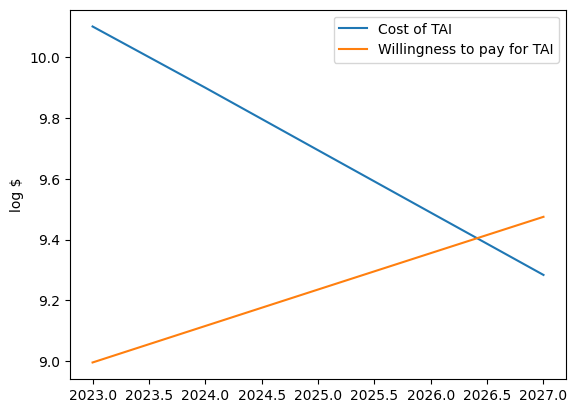

-
-
## SAMPLE RUN 2 ##
It takes 32.9 log FLOP (~794 nonillion) for transformative capabilities.
Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~996 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP available - TAI takes 32.9 log FLOP - log 2023$USD 15.6 to buy TAI vs. willingness to pay log $ 9.0 - 17.3 log FLOP per $ (Total FLOP 26.3 vs. Effective 2023-logFLOP: 26.3)
Year: 2024 - 26.5 max log FLOP available - TAI takes 32.8 log FLOP - log 2023$USD 15.4 to buy TAI vs. willingness to pay log $ 9.1 - 17.4 log FLOP per $ (Total FLOP 26.5 vs. Effective 2023-logFLOP: 26.7)
Year: 2025 - 26.8 max log FLOP available - TAI takes 32.7 l

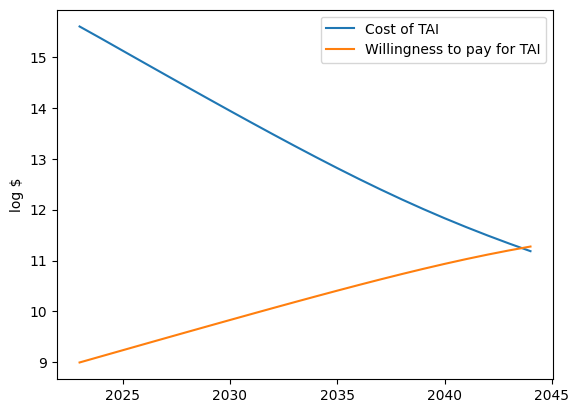

-
-
## SAMPLE RUN 3 ##
It takes 35.9 log FLOP (~794 decillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 3 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~996 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP available - TAI takes 35.9 log FLOP - log 2023$USD 18.6 to buy TAI vs. willingness to pay log $ 9.0 - 17.3 log FLOP per $ (Total FLOP 26.3 vs. Effective 2023-logFLOP: 26.3)
Year: 2024 - 26.5 max log FLOP available - TAI takes 35.8 log FLOP - log 2023$USD 18.3 to buy TAI vs. willingness to pay log $ 9.1 - 17.4 log FLOP per $ (Total FLOP 26.5 vs. Effective 2023-logFLOP: 26.7)
Year: 2025 - 26.8 max log FLOP available - TAI takes 35.6 l

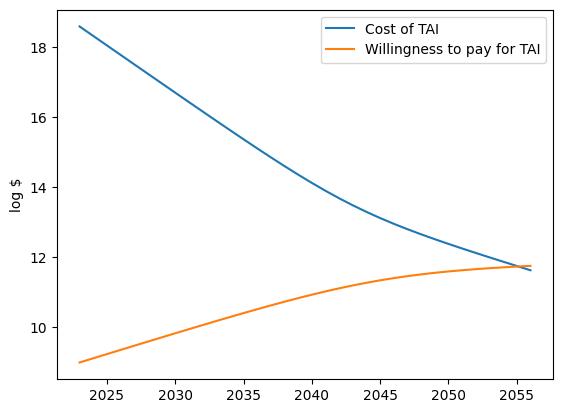

-
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1452.69it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 543.30it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2027',
 '10%: 2029',
 '15%: 2033',
 '20%: 2036',
 '25%: 2038',
 '35%: 2044',
 '50%: 2050',
 '60%: 2061',
 '75%: 2078',
 '80%: >2123',
 '90%: >2123',
 '95%: >2123']
(Mean: 2065)
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 4 years from now',
 '10%: 6 years from now',
 '15%: 10 years from now',
 '20%: 13 years from now',
 '25%: 15 years from now',
 '35%: 21 years from now',
 '50%: 27 years from now',
 '60%: 38 years from now',
 '75%: 55 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 42 years from now)
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 1.2%
2024-2025: 2.0%
2026-2027: 3.2%
2028-2029: 5.8%
2030-2034: 7.4%
2035-2039: 9.2%
2040-2049: 21.2%
2050-2059: 10.2%
2060-2069: 11.8%
2070-2079: 5.5%
2080-2089: 1.5%
2090-2099: 0.7%
2100-2109: 0.5%
2110-2119: 0.2%
>2120: 21.6%
-
-
## TAI ARR

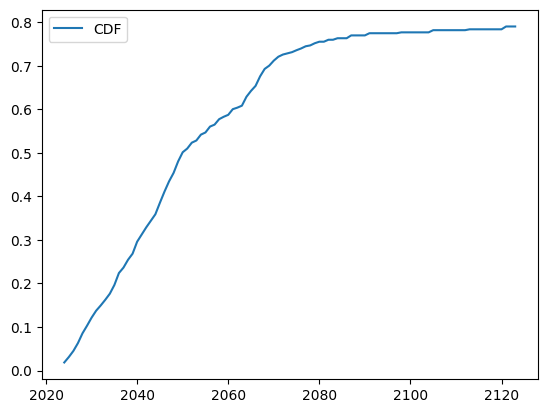

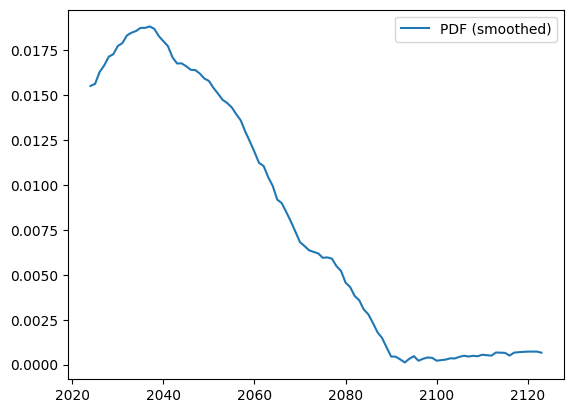

-
-
## TAI FLOP SIZE ##
{1: 26.1,
 5: 27.4,
 10: 28.3,
 20: 30.2,
 30: 32.1,
 40: 33.7,
 50: 35.2,
 60: 36.6,
 70: 38.7,
 80: 41.4,
 90: 45.6,
 95: 63.7,
 99: 67.8}
(Mean: 37.2)


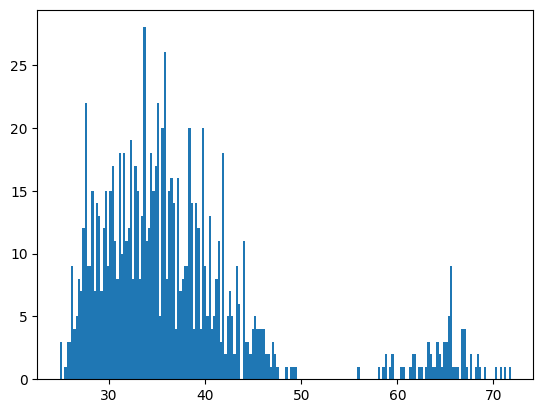

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOP PER DOLLAR: 17.3 ##
-
## FLOP HALVING RATE: 2.5 ##
-
## MAX FLOP PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


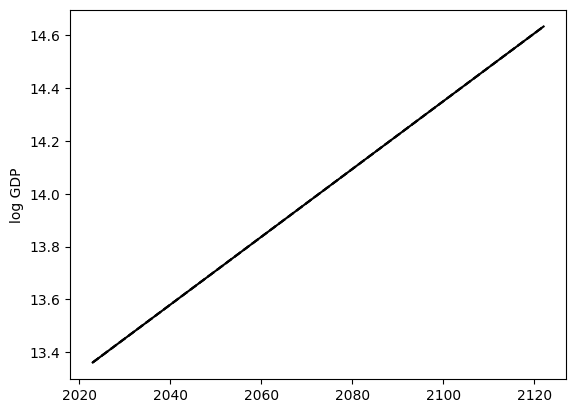

Year: 2023 - GDP log 2023$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2023$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2023$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2023$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2023$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2023$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2023$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2023$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2023$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2023$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

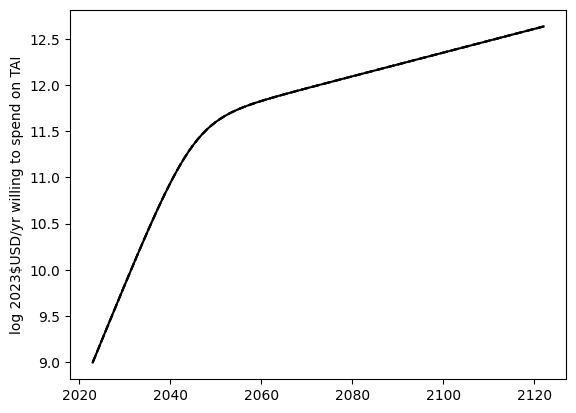

Year: 2023 - willingness log 2023$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2023$USD per year 9.1 (~1 billion) 90% CI 9.1 (~1 billion) - 9.1 (~1 billion)
Year: 2025 - willingness log 2023$USD per year 9.2 (~2 billion) 90% CI 9.2 (~2 billion) - 9.2 (~2 billion)
Year: 2026 - willingness log 2023$USD per year 9.4 (~2 billion) 90% CI 9.4 (~2 billion) - 9.4 (~2 billion)
Year: 2027 - willingness log 2023$USD per year 9.5 (~3 billion) 90% CI 9.5 (~3 billion) - 9.5 (~3 billion)
Year: 2028 - willingness log 2023$USD per year 9.6 (~4 billion) 90% CI 9.6 (~4 billion) - 9.6 (~4 billion)
Year: 2029 - willingness log 2023$USD per year 9.7 (~5 billion) 90% CI 9.7 (~5 billion) - 9.7 (~5 billion)
Year: 2030 - willingness log 2023$USD per year 9.8 (~7 billion) 90% CI 9.8 (~7 billion) - 9.8 (~7 billion)
Year: 2031 - willingness log 2023$USD per year 9.9 (~9 billion) 90% CI 9.9 (~9 billion) - 9.9 (~9 billion)
Year: 2032 - willingness log 20

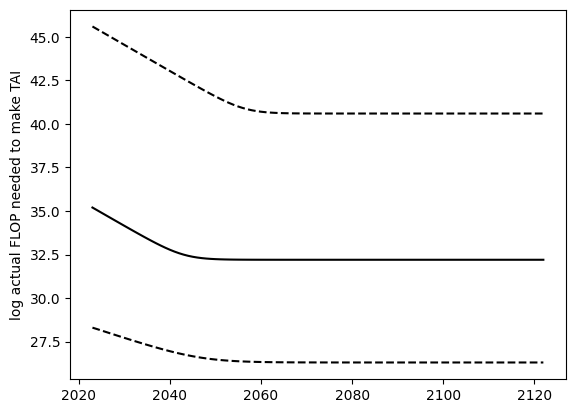

Year: 2023 - log FLOP needed for TAI 35.2 (~158 decillion) 90% CI 28.3 (~20 octillion) - 45.6 (~4 trillion decillion)
Year: 2024 - log FLOP needed for TAI 35.1 (~112 decillion) 90% CI 28.2 (~17 octillion) - 45.4 (~3 trillion decillion)
Year: 2025 - log FLOP needed for TAI 34.9 (~79 decillion) 90% CI 28.1 (~14 octillion) - 45.3 (~2 trillion decillion)
Year: 2026 - log FLOP needed for TAI 34.7 (~56 decillion) 90% CI 28.0 (~11 octillion) - 45.1 (~1 trillion decillion)
Year: 2027 - log FLOP needed for TAI 34.6 (~40 decillion) 90% CI 28.0 (~9 octillion) - 45.0 (~995 billion decillion)
Year: 2028 - log FLOP needed for TAI 34.4 (~28 decillion) 90% CI 27.9 (~8 octillion) - 44.8 (~704 billion decillion)
Year: 2029 - log FLOP needed for TAI 34.3 (~20 decillion) 90% CI 27.8 (~6 octillion) - 44.7 (~498 billion decillion)
Year: 2030 - log FLOP needed for TAI 34.2 (~14 decillion) 90% CI 27.7 (~5 octillion) - 44.5 (~352 billion decillion)
Year: 2031 - log FLOP needed for TAI 34.0 (~10 decillion) 90% 

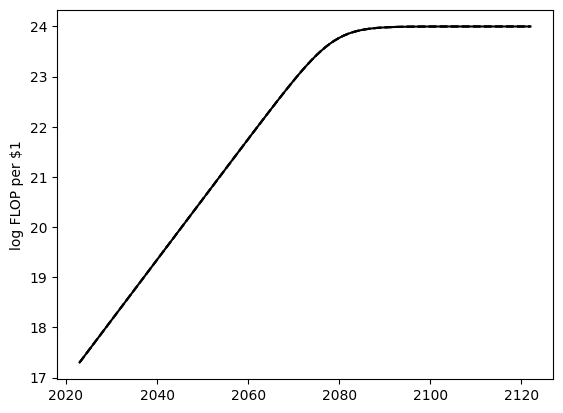

Year: 2023 - log FLOP per 2023$1USD 17.3 (~200 quadrillion) 90% CI 17.3 (~200 quadrillion) - 17.3 (~200 quadrillion)
Year: 2024 - log FLOP per 2023$1USD 17.4 (~263 quadrillion) 90% CI 17.4 (~263 quadrillion) - 17.4 (~263 quadrillion)
Year: 2025 - log FLOP per 2023$1USD 17.5 (~347 quadrillion) 90% CI 17.5 (~347 quadrillion) - 17.5 (~347 quadrillion)
Year: 2026 - log FLOP per 2023$1USD 17.7 (~458 quadrillion) 90% CI 17.7 (~458 quadrillion) - 17.7 (~458 quadrillion)
Year: 2027 - log FLOP per 2023$1USD 17.8 (~605 quadrillion) 90% CI 17.8 (~605 quadrillion) - 17.8 (~605 quadrillion)
Year: 2028 - log FLOP per 2023$1USD 17.9 (~798 quadrillion) 90% CI 17.9 (~798 quadrillion) - 17.9 (~798 quadrillion)
Year: 2029 - log FLOP per 2023$1USD 18.0 (~1 quintillion) 90% CI 18.0 (~1 quintillion) - 18.0 (~1 quintillion)
Year: 2030 - log FLOP per 2023$1USD 18.1 (~1 quintillion) 90% CI 18.1 (~1 quintillion) - 18.1 (~1 quintillion)
Year: 2031 - log FLOP per 2023$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 qu

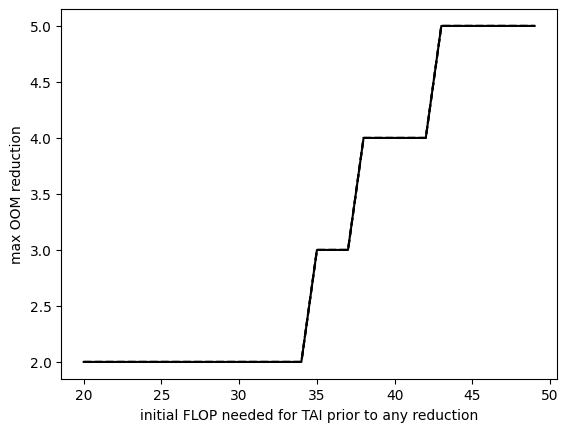

TAI log FLOP 20 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 34 -> 2.0 OOM reductions possible (

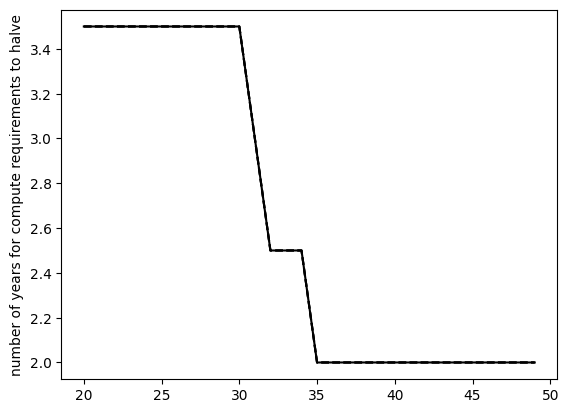

TAI log FLOP 20 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (90% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FL

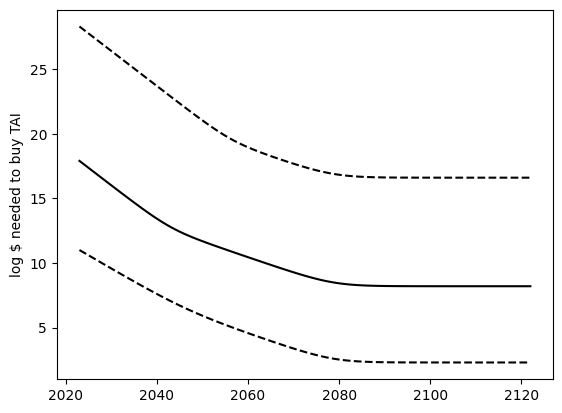

Year: 2023 - 17.9 log 2023$USD to buy TAI (~794 quadrillion) 90% CI 11.0 (~100 billion) - 28.3 (~20 octillion)
Year: 2024 - 17.6 log 2023$USD to buy TAI (~426 quadrillion) 90% CI 10.8 (~63 billion) - 28.0 (~11 octillion)
Year: 2025 - 17.4 log 2023$USD to buy TAI (~229 quadrillion) 90% CI 10.6 (~39 billion) - 27.8 (~6 octillion)
Year: 2026 - 17.1 log 2023$USD to buy TAI (~123 quadrillion) 90% CI 10.4 (~24 billion) - 27.5 (~3 octillion)
Year: 2027 - 16.8 log 2023$USD to buy TAI (~66 quadrillion) 90% CI 10.2 (~15 billion) - 27.2 (~2 octillion)
Year: 2028 - 16.5 log 2023$USD to buy TAI (~35 quadrillion) 90% CI 10.0 (~10 billion) - 26.9 (~882 septillion)
Year: 2029 - 16.3 log 2023$USD to buy TAI (~19 quadrillion) 90% CI 9.8 (~6 billion) - 26.7 (~473 septillion)
Year: 2030 - 16.0 log 2023$USD to buy TAI (~10 quadrillion) 90% CI 9.6 (~4 billion) - 26.4 (~253 septillion)
Year: 2031 - 15.7 log 2023$USD to buy TAI (~5 quadrillion) 90% CI 9.4 (~2 billion) - 26.1 (~136 septillion)
Year: 2032 - 15.

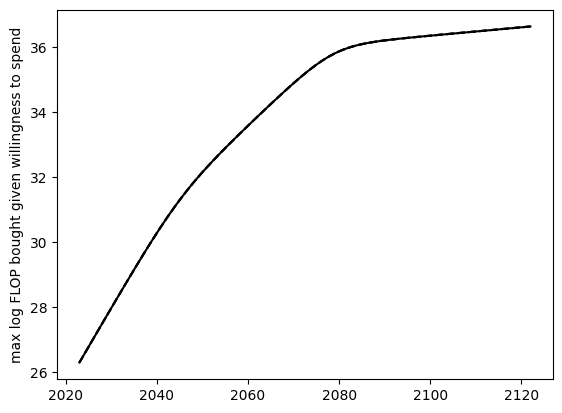

Year: 2023 - max log FLOP 26.3 (~199 septillion) 90% CI 26.3 (~199 septillion) - 26.3 (~199 septillion)
Year: 2024 - max log FLOP 26.5 (~345 septillion) 90% CI 26.5 (~345 septillion) - 26.5 (~345 septillion)
Year: 2025 - max log FLOP 26.8 (~601 septillion) 90% CI 26.8 (~601 septillion) - 26.8 (~601 septillion)
Year: 2026 - max log FLOP 27.0 (~1 octillion) 90% CI 27.0 (~1 octillion) - 27.0 (~1 octillion)
Year: 2027 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2028 - max log FLOP 27.5 (~3 octillion) 90% CI 27.5 (~3 octillion) - 27.5 (~3 octillion)
Year: 2029 - max log FLOP 27.7 (~5 octillion) 90% CI 27.7 (~5 octillion) - 27.7 (~5 octillion)
Year: 2030 - max log FLOP 28.0 (~9 octillion) 90% CI 28.0 (~9 octillion) - 28.0 (~9 octillion)
Year: 2031 - max log FLOP 28.2 (~16 octillion) 90% CI 28.2 (~16 octillion) - 28.2 (~16 octillion)
Year: 2032 - max log FLOP 28.5 (~28 octillion) 90% CI 28.5 (~28 octillion) - 28.5 (~28 octillion)
Year: 2033 - max 

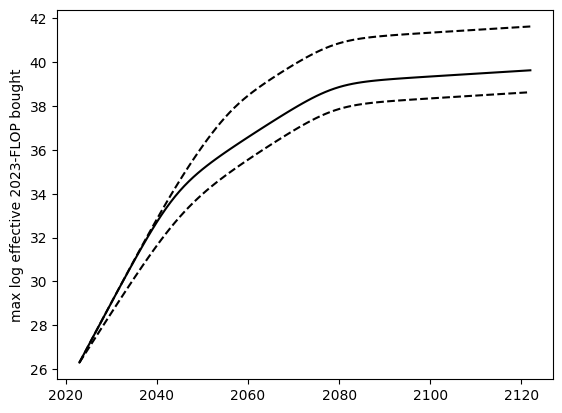

Year: 2023 - max log effective 2023-FLOP 26.3 (~199 septillion) 90% CI 26.3 (~199 septillion) - 26.3 (~199 septillion)
Year: 2024 - max log effective 2023-FLOP 26.7 (~488 septillion) 90% CI 26.6 (~416 septillion) - 26.7 (~489 septillion)
Year: 2025 - max log effective 2023-FLOP 27.1 (~1 octillion) 90% CI 26.9 (~879 septillion) - 27.1 (~1 octillion)
Year: 2026 - max log effective 2023-FLOP 27.5 (~3 octillion) 90% CI 27.3 (~2 octillion) - 27.5 (~3 octillion)
Year: 2027 - max log effective 2023-FLOP 27.9 (~7 octillion) 90% CI 27.6 (~4 octillion) - 27.9 (~7 octillion)
Year: 2028 - max log effective 2023-FLOP 28.2 (~18 octillion) 90% CI 27.9 (~8 octillion) - 28.3 (~18 octillion)
Year: 2029 - max log effective 2023-FLOP 28.6 (~43 octillion) 90% CI 28.2 (~17 octillion) - 28.6 (~44 octillion)
Year: 2030 - max log effective 2023-FLOP 29.0 (~106 octillion) 90% CI 28.6 (~36 octillion) - 29.0 (~107 octillion)
Year: 2031 - max log effective 2023-FLOP 29.4 (~257 octillion) 90% CI 28.9 (~76 octillion

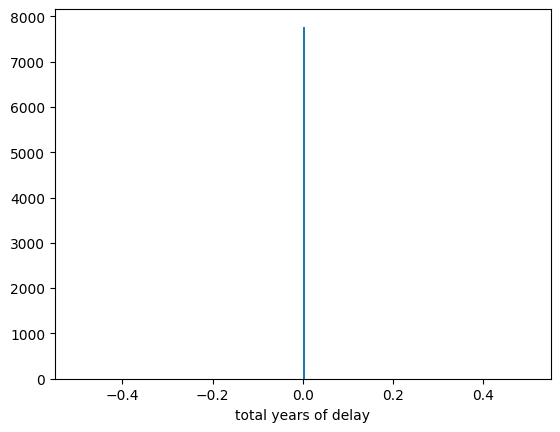

In [5]:
variables = VARIABLE_SETS['Cotra2020']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=variables['RUNS'])

## Run Cotra 2022

-
-
## SAMPLE RUN 1 ##
It takes 31.8 log FLOP (~63 nonillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~996 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP available - TAI takes 31.8 log FLOP - log 2023$USD 13.5 to buy TAI vs. willingness to pay log $ 9.0 - 18.3 log FLOP per $ (Total FLOP 27.3 vs. Effective 2023-logFLOP: 27.3)
Year: 2024 - 27.5 max log FLOP available - TAI takes 31.7 log FLOP - log 2023$USD 13.3 to buy TAI vs. willingness to pay log $ 9.1 - 18.4 log FLOP per $ (Total FLOP 27.5 vs. Effective 2023-logFLOP: 27.6)
Year: 2025 - 27.8 max log FLOP available - TAI takes 31.6 log 

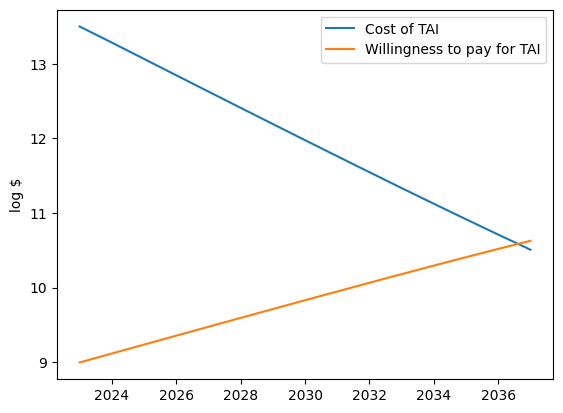

-
-
## SAMPLE RUN 2 ##
It takes 30.1 log FLOP (~1 nonillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~996 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP available - TAI takes 30.1 log FLOP - log 2023$USD 11.8 to buy TAI vs. willingness to pay log $ 9.0 - 18.3 log FLOP per $ (Total FLOP 27.3 vs. Effective 2023-logFLOP: 27.3)
Year: 2024 - 27.5 max log FLOP available - TAI takes 30.0 log FLOP - log 2023$USD 11.6 to buy TAI vs. willingness to pay log $ 9.1 - 18.4 log FLOP per $ (Total FLOP 27.5 vs. Effective 2023-logFLOP: 27.6)
Year: 2025 - 27.8 max log FLOP available - TAI takes 29.9 log F

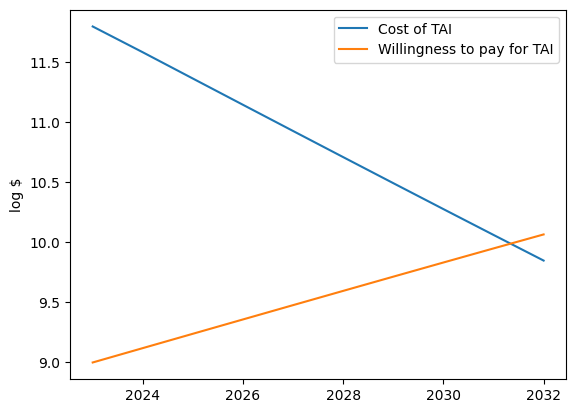

-
-
## SAMPLE RUN 3 ##
It takes 34.9 log FLOP (~79 decillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 3 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~996 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP available - TAI takes 34.9 log FLOP - log 2023$USD 16.6 to buy TAI vs. willingness to pay log $ 9.0 - 18.3 log FLOP per $ (Total FLOP 27.3 vs. Effective 2023-logFLOP: 27.3)
Year: 2024 - 27.5 max log FLOP available - TAI takes 34.8 log FLOP - log 2023$USD 16.3 to buy TAI vs. willingness to pay log $ 9.1 - 18.4 log FLOP per $ (Total FLOP 27.5 vs. Effective 2023-logFLOP: 27.7)
Year: 2025 - 27.8 max log FLOP available - TAI takes 34.6 log 

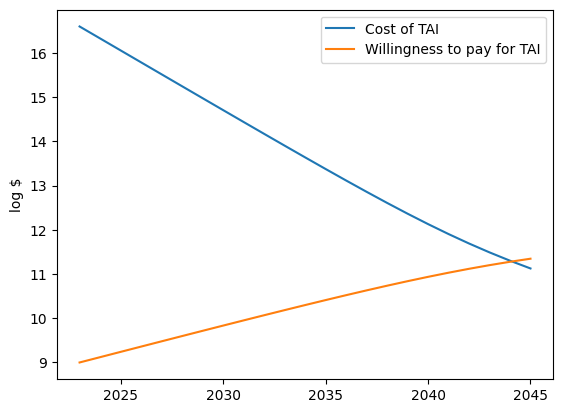

-
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1527.84it/s]


Shuffling data...
Writing data...
Waiting for other cores...
.Collecting data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 623.45it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2023',
 '10%: 2024',
 '15%: 2025',
 '20%: 2028',
 '25%: 2030',
 '35%: 2034',
 '50%: 2041',
 '60%: 2044',
 '75%: 2058',
 '80%: 2062',
 '90%: >2123',
 '95%: >2123']
(Mean: 2051)
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 0 years from now',
 '10%: 1 years from now',
 '15%: 2 years from now',
 '20%: 5 years from now',
 '25%: 7 years from now',
 '35%: 11 years from now',
 '50%: 18 years from now',
 '60%: 21 years from now',
 '75%: 35 years from now',
 '80%: 39 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 28 years from now)
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 8.9%
2024-2025: 6.1%
2026-2027: 4.6%
2028-2029: 6.6%
2030-2034: 11.0%
2035-2039: 11.5%
2040-2049: 21.0%
2050-2059: 9.5%
2060-2069: 6.4%
2070-2079: 1.3%
2080-2089: 0.7%
2090-2099: 0.3%
2100-2109: 0.2%
2110-2119: 0.1%
>2120: 13.6%
-
-
## TAI ARRIVAL D

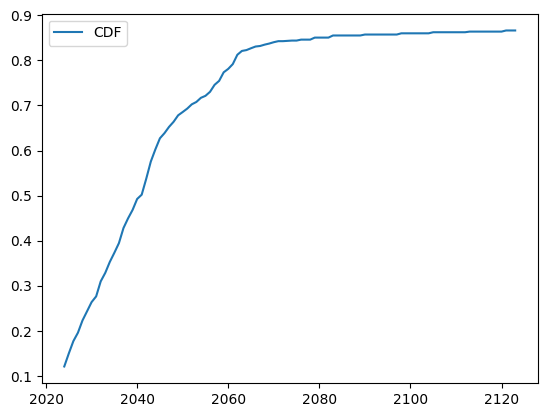

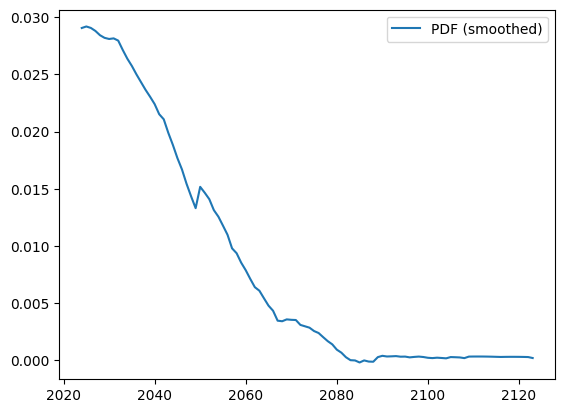

-
-
## TAI FLOP SIZE ##
{1: 25.0,
 5: 26.5,
 10: 27.4,
 20: 28.7,
 30: 30.4,
 40: 31.7,
 50: 33.0,
 60: 34.7,
 70: 36.4,
 80: 38.1,
 90: 42.0,
 95: 46.7,
 99: 66.6}
(Mean: 34.6)


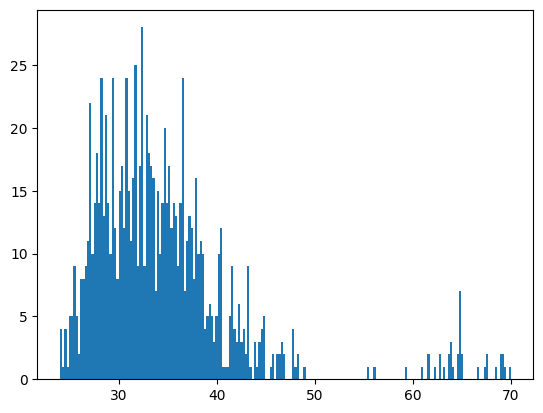

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOP PER DOLLAR: 18.3 ##
-
## FLOP HALVING RATE: 2.5 ##
-
## MAX FLOP PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


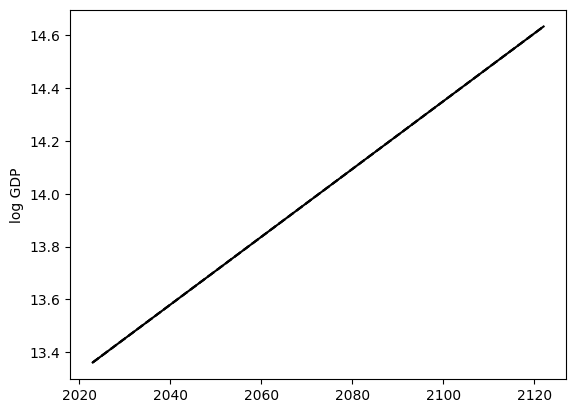

Year: 2023 - GDP log 2023$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2023$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2023$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2023$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2023$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2023$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2023$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2023$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2023$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2023$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

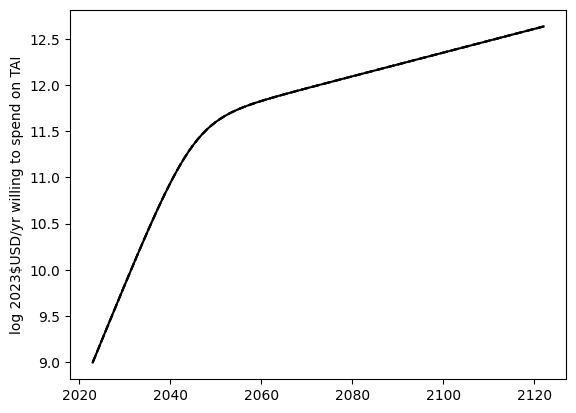

Year: 2023 - willingness log 2023$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2023$USD per year 9.1 (~1 billion) 90% CI 9.1 (~1 billion) - 9.1 (~1 billion)
Year: 2025 - willingness log 2023$USD per year 9.2 (~2 billion) 90% CI 9.2 (~2 billion) - 9.2 (~2 billion)
Year: 2026 - willingness log 2023$USD per year 9.4 (~2 billion) 90% CI 9.4 (~2 billion) - 9.4 (~2 billion)
Year: 2027 - willingness log 2023$USD per year 9.5 (~3 billion) 90% CI 9.5 (~3 billion) - 9.5 (~3 billion)
Year: 2028 - willingness log 2023$USD per year 9.6 (~4 billion) 90% CI 9.6 (~4 billion) - 9.6 (~4 billion)
Year: 2029 - willingness log 2023$USD per year 9.7 (~5 billion) 90% CI 9.7 (~5 billion) - 9.7 (~5 billion)
Year: 2030 - willingness log 2023$USD per year 9.8 (~7 billion) 90% CI 9.8 (~7 billion) - 9.8 (~7 billion)
Year: 2031 - willingness log 2023$USD per year 9.9 (~9 billion) 90% CI 9.9 (~9 billion) - 9.9 (~9 billion)
Year: 2032 - willingness log 20

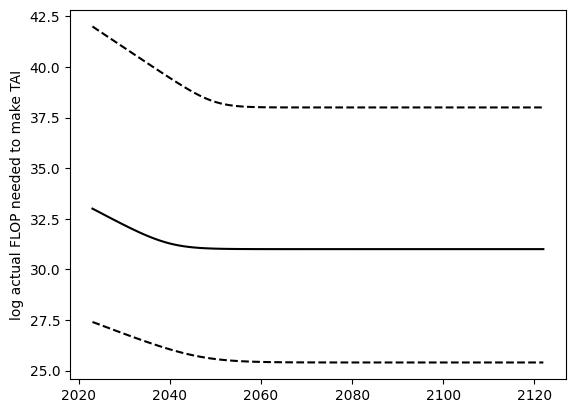

Year: 2023 - log FLOP needed for TAI 33.0 (~1000 nonillion) 90% CI 27.4 (~3 octillion) - 42.0 (~1 billion decillion)
Year: 2024 - log FLOP needed for TAI 32.9 (~768 nonillion) 90% CI 27.3 (~2 octillion) - 41.8 (~707 million decillion)
Year: 2025 - log FLOP needed for TAI 32.8 (~584 nonillion) 90% CI 27.2 (~2 octillion) - 41.7 (~500 million decillion)
Year: 2026 - log FLOP needed for TAI 32.6 (~445 nonillion) 90% CI 27.1 (~1 octillion) - 41.5 (~354 million decillion)
Year: 2027 - log FLOP needed for TAI 32.5 (~340 nonillion) 90% CI 27.1 (~1 octillion) - 41.4 (~250 million decillion)
Year: 2028 - log FLOP needed for TAI 32.4 (~260 nonillion) 90% CI 27.0 (~958 septillion) - 41.2 (~177 million decillion)
Year: 2029 - log FLOP needed for TAI 32.3 (~199 nonillion) 90% CI 26.9 (~791 septillion) - 41.1 (~125 million decillion)
Year: 2030 - log FLOP needed for TAI 32.2 (~154 nonillion) 90% CI 26.8 (~653 septillion) - 40.9 (~88 million decillion)
Year: 2031 - log FLOP needed for TAI 32.1 (~119 n

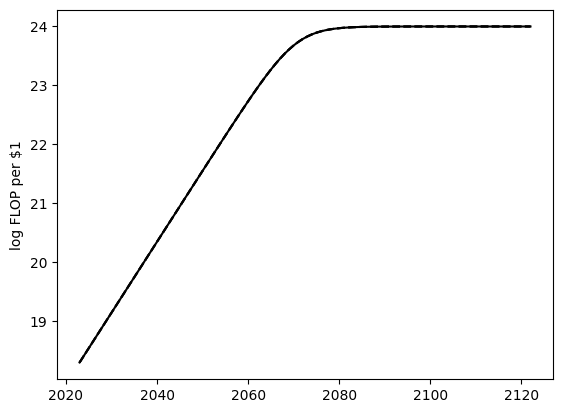

Year: 2023 - log FLOP per 2023$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP per 2023$1USD 18.4 (~3 quintillion) 90% CI 18.4 (~3 quintillion) - 18.4 (~3 quintillion)
Year: 2025 - log FLOP per 2023$1USD 18.5 (~3 quintillion) 90% CI 18.5 (~3 quintillion) - 18.5 (~3 quintillion)
Year: 2026 - log FLOP per 2023$1USD 18.7 (~5 quintillion) 90% CI 18.7 (~5 quintillion) - 18.7 (~5 quintillion)
Year: 2027 - log FLOP per 2023$1USD 18.8 (~6 quintillion) 90% CI 18.8 (~6 quintillion) - 18.8 (~6 quintillion)
Year: 2028 - log FLOP per 2023$1USD 18.9 (~8 quintillion) 90% CI 18.9 (~8 quintillion) - 18.9 (~8 quintillion)
Year: 2029 - log FLOP per 2023$1USD 19.0 (~11 quintillion) 90% CI 19.0 (~11 quintillion) - 19.0 (~11 quintillion)
Year: 2030 - log FLOP per 2023$1USD 19.1 (~14 quintillion) 90% CI 19.1 (~14 quintillion) - 19.1 (~14 quintillion)
Year: 2031 - log FLOP per 2023$1USD 19.3 (~18 quintillion) 90% CI 19.3 (~18 quintillion) - 19.3 (~18 quint

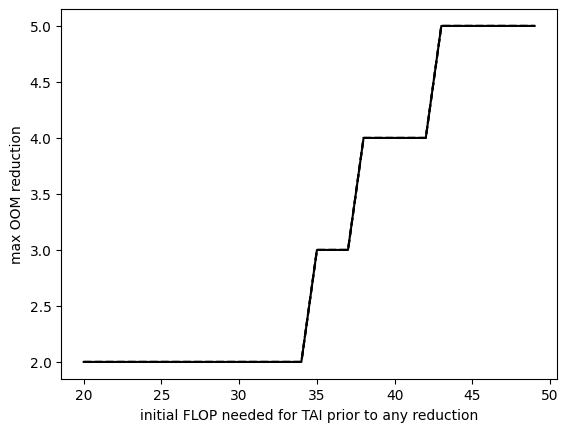

TAI log FLOP 20 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 34 -> 2.0 OOM reductions possible (

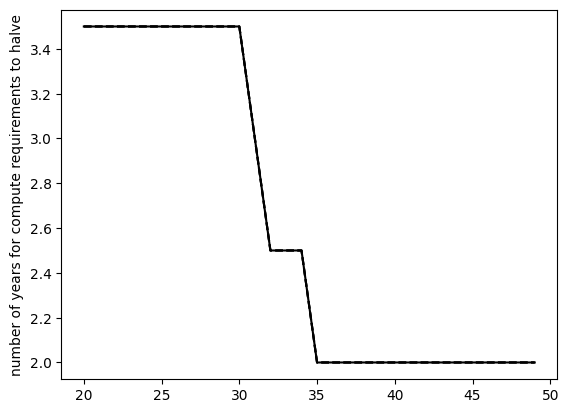

TAI log FLOP 20 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (90% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FL

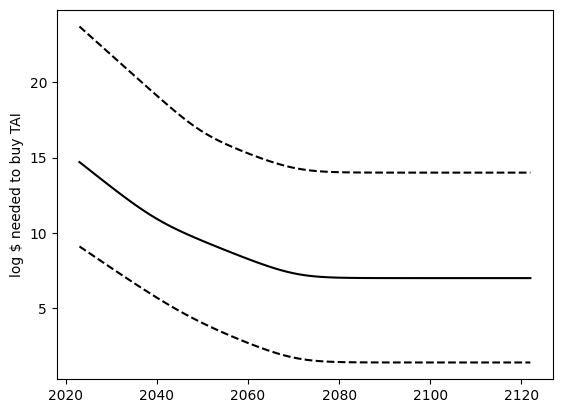

Year: 2023 - 14.7 log 2023$USD to buy TAI (~501 trillion) 90% CI 9.1 (~1 billion) - 23.7 (~501 sextillion)
Year: 2024 - 14.5 log 2023$USD to buy TAI (~292 trillion) 90% CI 8.9 (~792 million) - 23.4 (~269 sextillion)
Year: 2025 - 14.2 log 2023$USD to buy TAI (~168 trillion) 90% CI 8.7 (~494 million) - 23.2 (~144 sextillion)
Year: 2026 - 14.0 log 2023$USD to buy TAI (~97 trillion) 90% CI 8.5 (~308 million) - 22.9 (~77 sextillion)
Year: 2027 - 13.7 log 2023$USD to buy TAI (~56 trillion) 90% CI 8.3 (~192 million) - 22.6 (~41 sextillion)
Year: 2028 - 13.5 log 2023$USD to buy TAI (~33 trillion) 90% CI 8.1 (~120 million) - 22.3 (~22 sextillion)
Year: 2029 - 13.3 log 2023$USD to buy TAI (~19 trillion) 90% CI 7.9 (~75 million) - 22.1 (~12 sextillion)
Year: 2030 - 13.0 log 2023$USD to buy TAI (~11 trillion) 90% CI 7.7 (~47 million) - 21.8 (~6 sextillion)
Year: 2031 - 12.8 log 2023$USD to buy TAI (~6 trillion) 90% CI 7.5 (~29 million) - 21.5 (~3 sextillion)
Year: 2032 - 12.6 log 2023$USD to buy T

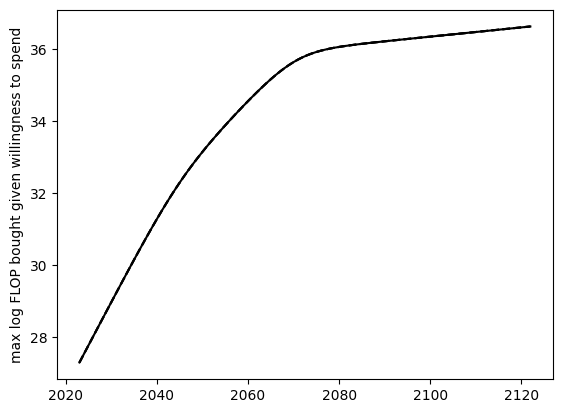

Year: 2023 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2024 - max log FLOP 27.5 (~3 octillion) 90% CI 27.5 (~3 octillion) - 27.5 (~3 octillion)
Year: 2025 - max log FLOP 27.8 (~6 octillion) 90% CI 27.8 (~6 octillion) - 27.8 (~6 octillion)
Year: 2026 - max log FLOP 28.0 (~10 octillion) 90% CI 28.0 (~10 octillion) - 28.0 (~10 octillion)
Year: 2027 - max log FLOP 28.3 (~18 octillion) 90% CI 28.3 (~18 octillion) - 28.3 (~18 octillion)
Year: 2028 - max log FLOP 28.5 (~31 octillion) 90% CI 28.5 (~31 octillion) - 28.5 (~31 octillion)
Year: 2029 - max log FLOP 28.7 (~55 octillion) 90% CI 28.7 (~55 octillion) - 28.7 (~55 octillion)
Year: 2030 - max log FLOP 29.0 (~94 octillion) 90% CI 29.0 (~94 octillion) - 29.0 (~94 octillion)
Year: 2031 - max log FLOP 29.2 (~163 octillion) 90% CI 29.2 (~163 octillion) - 29.2 (~163 octillion)
Year: 2032 - max log FLOP 29.5 (~282 octillion) 90% CI 29.5 (~282 octillion) - 29.5 (~282 octillion)
Year: 2033 - max log FL

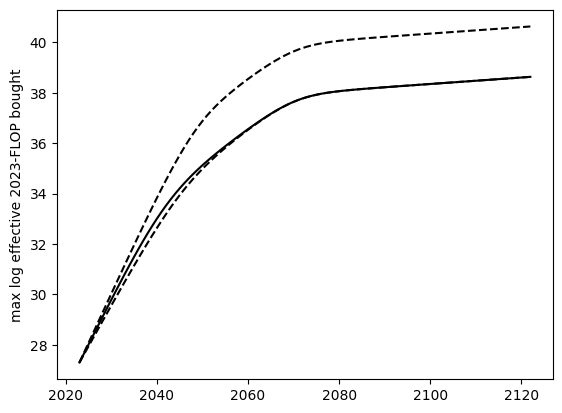

Year: 2023 - max log effective 2023-FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2024 - max log effective 2023-FLOP 27.7 (~4 octillion) 90% CI 27.6 (~4 octillion) - 27.7 (~5 octillion)
Year: 2025 - max log effective 2023-FLOP 28.0 (~10 octillion) 90% CI 27.9 (~9 octillion) - 28.1 (~12 octillion)
Year: 2026 - max log effective 2023-FLOP 28.4 (~23 octillion) 90% CI 28.3 (~19 octillion) - 28.5 (~30 octillion)
Year: 2027 - max log effective 2023-FLOP 28.7 (~53 octillion) 90% CI 28.6 (~39 octillion) - 28.9 (~72 octillion)
Year: 2028 - max log effective 2023-FLOP 29.1 (~121 octillion) 90% CI 28.9 (~82 octillion) - 29.2 (~178 octillion)
Year: 2029 - max log effective 2023-FLOP 29.4 (~273 octillion) 90% CI 29.2 (~173 octillion) - 29.6 (~436 octillion)
Year: 2030 - max log effective 2023-FLOP 29.8 (~615 octillion) 90% CI 29.6 (~363 octillion) - 30.0 (~1 nonillion)
Year: 2031 - max log effective 2023-FLOP 30.1 (~1 nonillion) 90% CI 29.9 (~759 octillion) - 30.4 

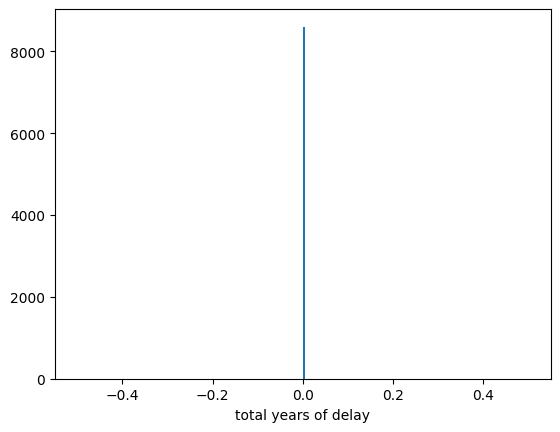

In [6]:
variables = VARIABLE_SETS['Cotra2022']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=RUNS)

In [7]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-12-26 12:05:11.493896
